# 1. Data Loading From Excel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import importlib
import utils

In [28]:
importlib.reload(utils)

<module 'utils' from '/home/tux/ml_proyecto_final/notebooks/utils.py'>

In [3]:
# Obtaining a workable dataset

df = pd.read_excel("../data/raw/appendicitis_tabular_data.xlsx", sheet_name=0)
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [4]:
# data = pd.read_excel("https://zenodo.org/record/7711412/files/app_data.xlsx?download=1", sheet_name=0)

### Ideas for later:
- Categorize BMI values into underweight, normal, overweight, and obese.
- Maybe categorize child age into groups like infant, toddler, preschooler, school-age, adolescent. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12  Appendix

In [6]:
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [7]:
df.shape

(782, 58)

In [8]:
df.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346483,18.906916,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.387899,425.515789
std,3.529979,4.385252,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433588,271.585211
min,0.000000,7.827983,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725294,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.438741,18.062284,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.099932,21.179011,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.156221,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


In [9]:
df.dtypes

Age                                 float64
BMI                                 float64
Sex                                  object
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Management                           object
Severity                             object
Diagnosis_Presumptive                object
Diagnosis                            object
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                       object
Appendix_Diameter                   float64
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
WBC_Count                           float64
Neutrophil_Percentage           

In [10]:
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 0


# Missing values analysis

In [11]:
df.isnull().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Management                            1
Severity                              1
Diagnosis_Presumptive                 2
Diagnosis                             2
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50


In [12]:
missing_count = df.isnull().sum()
missing_pct = 100 * missing_count / len(df)
missing = pd.concat([missing_count, missing_pct], axis=1)
missing.columns = ['missing_count', 'missing_pct']
missing = missing.sort_values('missing_pct', ascending=False)
missing.head(30)

,missing_count,missing_pct
Abscess_Location,769,98.337596
Gynecological_Findings,756,96.675192
Conglomerate_of_Bowel_Loops,739,94.501279
Segmented_Neutrophils,728,93.094629
Ileus,722,92.327366
Perfusion,719,91.943734
Enteritis,716,91.560102
Appendicolith,713,91.176471
Coprostasis,711,90.920716
Perforation,701,89.641944


Too many missing values in some columns, lets understand better with a graph

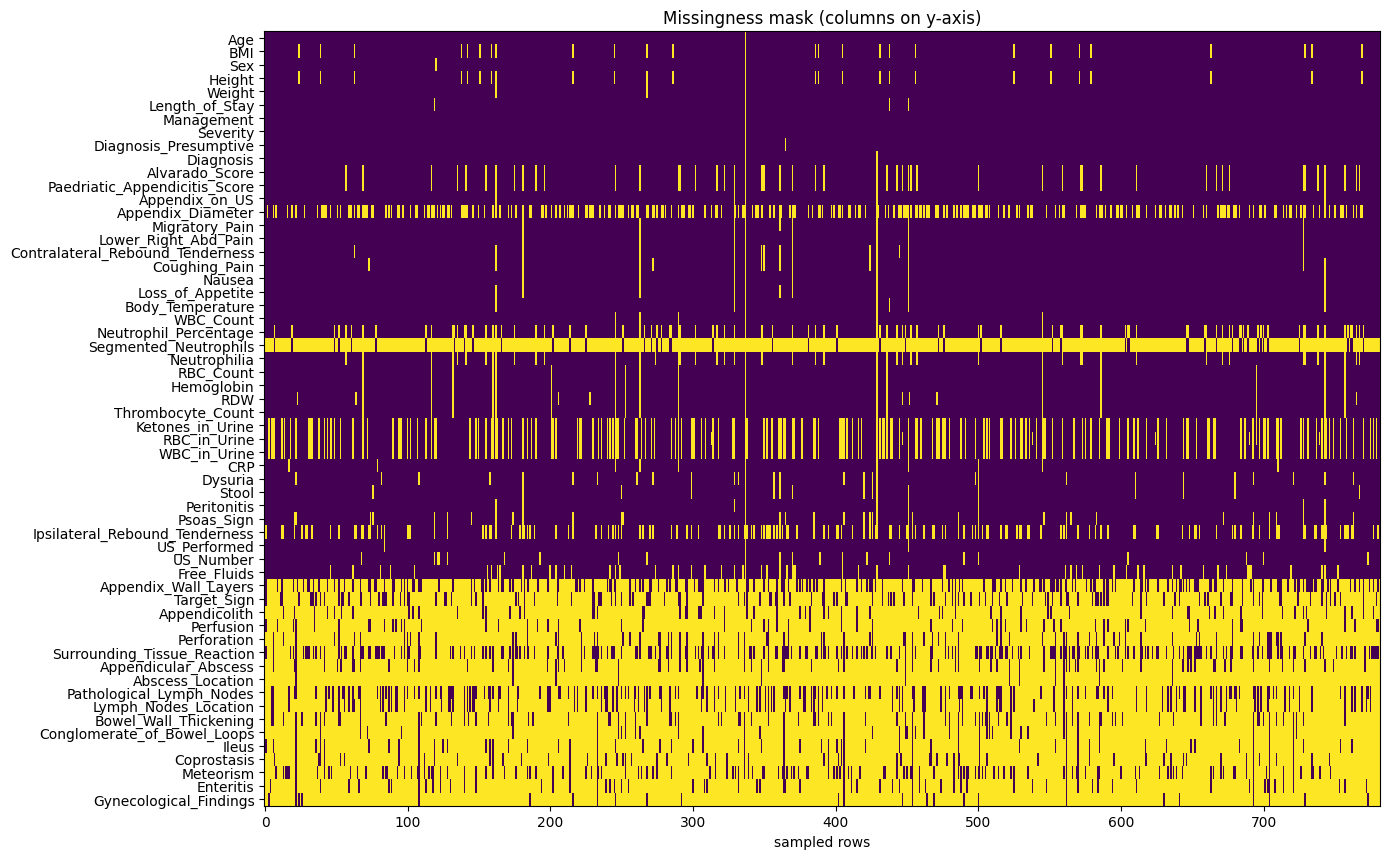

In [13]:
nrows = min(len(df), 1000)
sample = df.sample(n=nrows, random_state=0)

mask = sample.isnull().T  # transpose to have columns on y-axis

plt.figure(figsize=(14, max(6, 0.15*mask.shape[0])))
plt.imshow(mask, aspect='auto', interpolation='nearest')
plt.yticks(ticks=np.arange(len(mask.index)), labels=mask.index)
plt.xlabel('sampled rows')
plt.title('Missingness mask (columns on y-axis)')
plt.tight_layout()
plt.show()

Lets verify if there are any correlations between the missing values in the dataset

In [14]:
!pip install missingno

In [15]:
import missingno as msno

In [16]:
TOP_N = 15

# get top N columns with most missing values
top_missing_cols = (
    df.isnull().sum()
    .sort_values(ascending=False)
    .head(TOP_N)
    .index
)

df_top_missing = df[top_missing_cols]

In [17]:
df_top_missing.columns

Index(['Abscess_Location', 'Gynecological_Findings',
       'Conglomerate_of_Bowel_Loops', 'Segmented_Neutrophils', 'Ileus',
       'Perfusion', 'Enteritis', 'Appendicolith', 'Coprostasis', 'Perforation',
       'Appendicular_Abscess', 'Bowel_Wall_Thickening', 'Lymph_Nodes_Location',
       'Target_Sign', 'Meteorism'],
      dtype='object')

<Axes: >

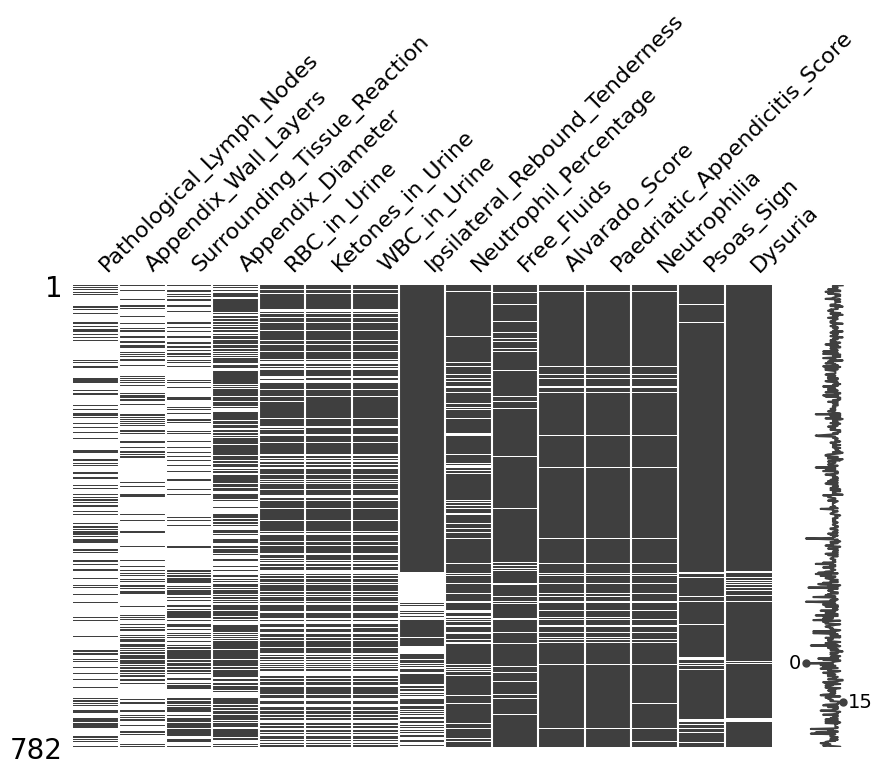

In [30]:
msno.matrix(df_top_missing, figsize=(10, 6))

In [20]:
high_missing_cols = [
    'Abscess_Location', 'Gynecological_Findings', 'Conglomerate_of_Bowel_Loops',
    'Segmented_Neutrophils', 'Ileus', 'Perfusion', 'Enteritis', 'Appendicolith',
    'Coprostasis', 'Perforation', 'Appendicular_Abscess', 'Bowel_Wall_Thickening',
    'Lymph_Nodes_Location', 'Target_Sign', 'Meteorism'
]
ref_cols = ['US_Performed', 'CT_Performed', 'MRI_Performed', 'Age', 'Sex']
summary = utils.missingness_auc_summary(df, target_cols=high_missing_cols, ref_cols=ref_cols, fill_ref_na=np.nan)
display(summary.head(50))

,ref_col,target_col,n_total,n_missing,pct_missing,auc,auc_abs_dev_from_0_5
30,Sex,Abscess_Location,782,769,0.983376,0.448635,0.051365
0,US_Performed,Abscess_Location,782,769,0.983376,0.487646,0.012354
15,Age,Abscess_Location,782,769,0.983376,NaN,NaN
31,Sex,Gynecological_Findings,782,756,0.966752,0.685847,0.185847
1,US_Performed,Gynecological_Findings,782,756,0.966752,0.487434,0.012566
16,Age,Gynecological_Findings,782,756,0.966752,NaN,NaN
32,Sex,Conglomerate_of_Bowel_Loops,782,739,0.945013,0.513579,0.013579
2,US_Performed,Conglomerate_of_Bowel_Loops,782,739,0.945013,0.487145,0.012855
17,Age,Conglomerate_of_Bowel_Loops,782,739,0.945013,NaN,NaN
33,Sex,Segmented_Neutrophils,782,728,0.930946,0.438111,0.061889


In [21]:
df_no_high_missing = df.drop(columns=high_missing_cols)
df_no_high_missing.shape

(782, 43)

In [29]:
TOP_N = 15

top_missing_cols = utils.get_top_missing_columns(df_no_high_missing, top_n=TOP_N)

df_top_missing = df[top_missing_cols]

In [23]:
df_top_missing.columns

Index(['Pathological_Lymph_Nodes', 'Appendix_Wall_Layers',
       'Surrounding_Tissue_Reaction', 'Appendix_Diameter', 'RBC_in_Urine',
       'Ketones_in_Urine', 'WBC_in_Urine', 'Ipsilateral_Rebound_Tenderness',
       'Neutrophil_Percentage', 'Free_Fluids', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Neutrophilia', 'Psoas_Sign',
       'Dysuria'],
      dtype='object')

<Axes: >

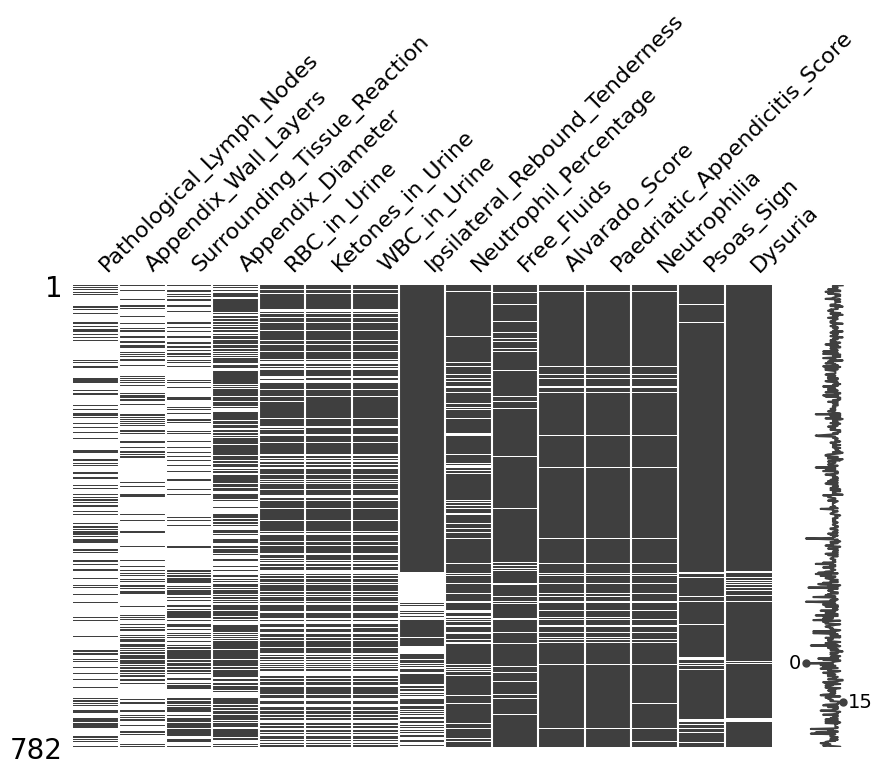

In [24]:
msno.matrix(df_top_missing, figsize=(10, 6))

In [25]:
missing_count = df_top_missing.isnull().sum()
missing_pct = 100 * missing_count / len(df)
missing = pd.concat([missing_count, missing_pct], axis=1)
missing.columns = ['missing_count', 'missing_pct']
missing = missing.sort_values('missing_pct', ascending=False)
missing.head(30)

,missing_count,missing_pct
Pathological_Lymph_Nodes,579,74.040921
Appendix_Wall_Layers,564,72.122762
Surrounding_Tissue_Reaction,530,67.774936
Appendix_Diameter,284,36.317136
RBC_in_Urine,206,26.342711
Ketones_in_Urine,200,25.575448
WBC_in_Urine,199,25.447570
Ipsilateral_Rebound_Tenderness,163,20.843990
Neutrophil_Percentage,103,13.171355
Free_Fluids,63,8.056266


In [ ]:
df_no_high_missing = df.drop(columns=high_missing_cols)
df_no_high_missing.shape